<a href="https://colab.research.google.com/github/jesminmousumy/Python-Programming/blob/main/Customer_Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   56         76228             97
1           2   69         63984              1
2           3   46         55774             19
3           4   32         17568              2
4           5   60         77592             53
   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   56         76228             97        1
1           2   69         63984              1        0
2           3   46         55774             19        0
3           4   32         17568              2        2
4           5   60         77592             53        0


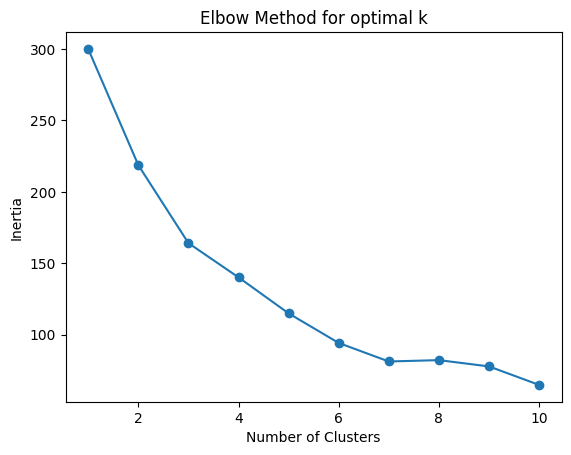

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster  OptimalCluster
0           1   56         76228             97        1               3
1           2   69         63984              1        0               0
2           3   46         55774             19        0               0
3           4   32         17568              2        2               2
4           5   60         77592             53        0               3


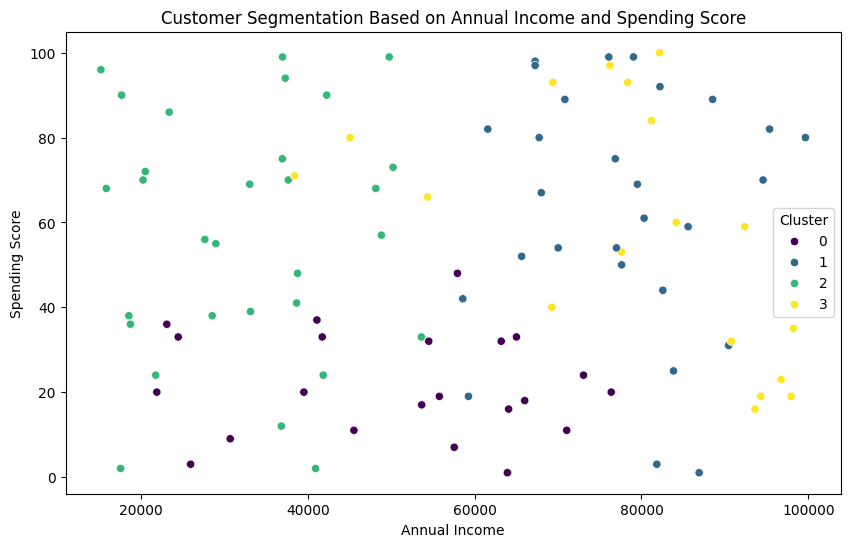

In [12]:
#Import Some libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


#CREATE THE DATASET

#Creating a sample dataset for customer segmentation
np.random.seed(42)


#Creating a dictionary for that dataset
data = {
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 70, size=100),
    'AnnualIncome': np.random.randint(15000, 100000, size=100),
    'SpendingScore': np.random.randint(1, 101, size=100)
}

#Create a dataframe
df = pd.DataFrame(data)

#Display the first few rows of the dataset
print(df.head())

#DATA PRE-PROCESSING
#select the features
x = df[['Age', 'AnnualIncome', 'SpendingScore']]

#Create an instance of STANDERDscaler
scaler = StandardScaler()

#Fit and transform the Data
x_scaled = scaler.fit_transform(x)

#APPLYING K-MEANS CLUSTERING

#Apply k-means clutering with 3 clusters
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(x_scaled)  #fit the model to data

#Add the cluster labels to the original dataframe
df['Cluster'] = k_means.fit_predict(x_scaled)



#Display the first few rows of the dataset with cluster assignments
print(df.head())

#DETERMINE OPTIMAL CLUSTERS (ELBOW METHOD)
#Calculate inertia for different numbers of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)

#plot the elbow method graph
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#REAPPLYING K-MEANS WITH OPTIMAL CLUSTERS

#apply k-means with the optimal number of clusters (4)
optimal_kmeans = KMeans(n_clusters=4, random_state=42)
optimal_kmeans.fit(x_scaled)

#add the cluster labels to the original dataframe
df['OptimalCluster'] = optimal_kmeans.labels_
print(df.head())

#VISUALIZATION OF CLUSTERS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='viridis')
plt.title('Customer Segmentation Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()
